## find round chips by hough transform
- [original discussion](http://www.mathworks.com/help/images/examples/detect-and-measure-circular-objects-in-an-image.html)
- why it is a good test image:
    - chips are overlayed (even with pen)
    - some chips are highly contrasted with background, e.g, red and blue, some are not, e.g, yellow

In [1]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
from skimage import io, feature, transform, measure, color, filters, morphology, draw
import numpy as np

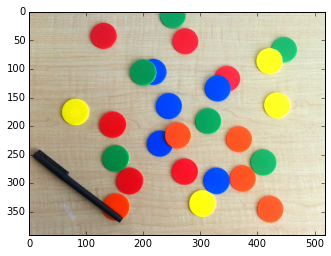

In [3]:
img = io.imread("http://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/coloredChips.png")
plt.imshow(img)

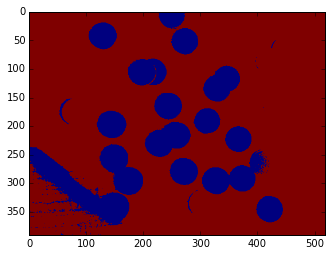

In [4]:
gray = color.rgb2gray(img)
## direct binarization may not give the good segmentation
bw = gray > filters.threshold_otsu(gray)
plt.imshow(bw)

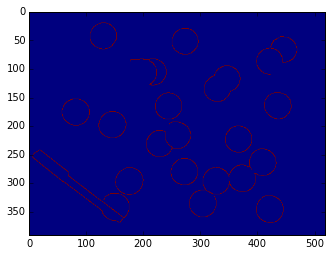

In [5]:
## we could use the canny edges directly from the image
direct_edges = feature.canny(gray, low_threshold=.1, high_threshold=.8)
plt.imshow(direct_edges)

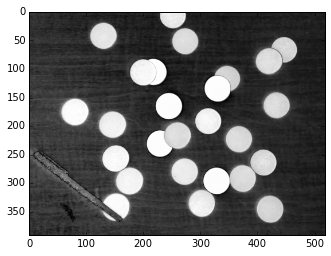

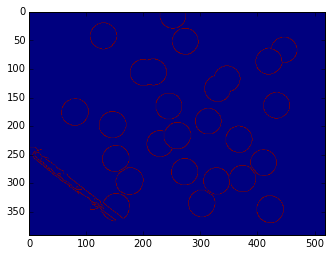

In [6]:
## OR to look at the hsv space
hsv = color.rgb2hsv(img)
sspace = hsv[:, :, 1]

plt.imshow(sspace, cmap = plt.cm.gray)
plt.figure()
edges = feature.canny(sspace, low_threshold=.1, high_threshold=.9, )
plt.imshow(edges, )

In [45]:
## estimate the radius of chips to be between 20, 25
radii = np.arange(20, 26, 1)
## circle centers and heat maps
hough_results = transform.hough_circle(edges, radii, )
## find the local maxima in each heatmap
detection_centers, detection_confidences, detection_radii = [], [], []
num_peaks = 20
for r, hm in zip(radii, hough_results):
    centers = feature.peak_local_max(hm, indices=True, num_peaks=num_peaks, )
    confidences = hm[centers[:, 0], centers[:, 1]]
    detection_centers.append(centers)
    detection_confidences.append(confidences)
    detection_radii.append([r] * num_peaks)
    
detection_centers = np.concatenate(detection_centers, axis = 0)
detection_confidences = np.concatenate(detection_confidences, axis = 0)
detection_radii = np.concatenate(detection_radii, axis = 0)

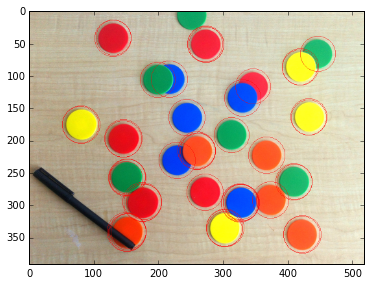

In [50]:
ii = np.argsort(detection_confidences)[::-1]
centers = detection_centers[ii]
confidences = detection_confidences[ii]
radii = detection_radii[ii]

plotimg = img.copy()

for (row, col), c, r in zip(centers, confidences, radii)[:50]:
    rr, cc = draw.circle_perimeter(row, col, r+5, )
    plotimg[rr, cc] = plotimg[rr, cc] * .5 + np.array([255., 0., 0., ]) * .5
    
plt.figure(figsize = (6, 6))
plt.imshow(plotimg)